# # Project_03    Group-2

# Twitter Semantic Analysis 

Business Objective:	
- Need to get sentiment analysis of tweets gauge its impact and type

Architecture level analysis:


1.Data transformation/Text processing using R/Python

2.Need to get sentiments Analysis and Emotion mining with some charts like histogram, Density plot, Barplot, pie-plot etc.

3.Deployment through R Shiny or Flask/ Streamlit


# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re 
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stopwords= nltk.corpus.stopwords.words('english')
from wordcloud import WordCloud
from nltk.stem import PorterStemmer,WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report


# Loading Dataset

In [2]:
df=pd.read_csv("tweet.csv")

In [3]:
df.head()

,tweets,class
0,Be aware dirty step to get money #staylight ...,figurative
1,#sarcasm for #people who don't understand #diy...,figurative
2,@IminworkJeremy @medsingle #DailyMail readers ...,figurative
3,@wilw Why do I get the feeling you like games?...,figurative
4,-@TeacherArthurG @rweingarten You probably jus...,figurative


In [4]:
df["tweets"][0]

'Be aware  dirty step to get money  #staylight #staywhite  #sarcastic #moralneeded @… https://t.co/Oj6BdyX3WG'

# EDA 

In [5]:
df.shape

(81408, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81408 entries, 0 to 81407
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweets  81408 non-null  object
 1   class   81408 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [7]:
df["class"].value_counts()

figurative    21238
irony         20894
sarcasm       20681
regular       18595
Name: class, dtype: int64

### Checking for null values

In [8]:
df.isna().sum()

tweets    0
class     0
dtype: int64

### Checking for Duplicate values

In [9]:
df.duplicated().sum()

49

In [10]:
# dropping the duplicates in text
df=df.drop_duplicates(keep="first")

In [11]:
df.duplicated().sum()

0

In [12]:
df.shape

(81359, 2)

In [13]:
df["class"].nunique()

4

### Distribution of Target class

In [14]:
df["class"].value_counts()

figurative    21235
irony         20877
sarcasm       20678
regular       18569
Name: class, dtype: int64

### count plot for class distribution

<AxesSubplot:xlabel='class', ylabel='count'>

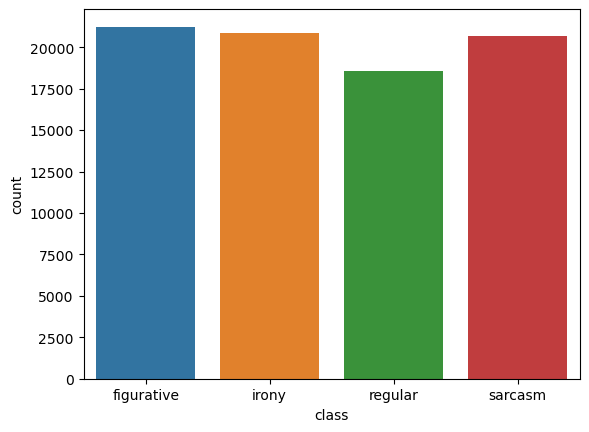

In [15]:
sns.countplot(x="class",data=df)

### Pie chart representing class distribution

<AxesSubplot:ylabel='class'>

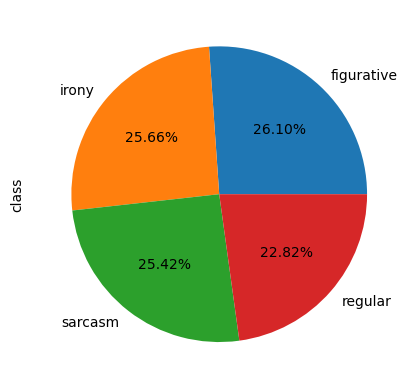

In [16]:
df["class"].value_counts().plot(kind = "pie", autopct='%.2f%%')

- ### Data is balanced

### Creating new columns

In [17]:
## num of characters
df["num_characters"]=df["tweets"].apply(len)

In [18]:
df.head()

,tweets,class,num_characters
0,Be aware dirty step to get money #staylight ...,figurative,108
1,#sarcasm for #people who don't understand #diy...,figurative,80
2,@IminworkJeremy @medsingle #DailyMail readers ...,figurative,132
3,@wilw Why do I get the feeling you like games?...,figurative,55
4,-@TeacherArthurG @rweingarten You probably jus...,figurative,75


In [19]:
# figurative class distribution
df[df["class"]=="figurative"]["num_characters"].describe()

count    21235.000000
mean        99.532894
std         31.273433
min          6.000000
25%         74.000000
50%        103.000000
75%        129.000000
max        161.000000
Name: num_characters, dtype: float64

In [20]:
# irony class distribution
df[df["class"]=="irony"]['num_characters'].describe()

count    20877.000000
mean       103.887005
std         30.502410
min          6.000000
25%         79.000000
50%        109.000000
75%        133.000000
max        152.000000
Name: num_characters, dtype: float64

In [21]:
# sarcasm class distribution
df[df["class"]=="sarcasm"]['num_characters'].describe()

count    20678.000000
mean        95.561321
std         31.384390
min          8.000000
25%         70.000000
50%         96.000000
75%        125.000000
max        161.000000
Name: num_characters, dtype: float64

In [22]:
# regular class distribution
df[df["class"]=="regular"]['num_characters'].describe()

count    18569.000000
mean       111.854596
std         26.777406
min         19.000000
25%         94.000000
50%        120.000000
75%        135.000000
max        156.000000
Name: num_characters, dtype: float64

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

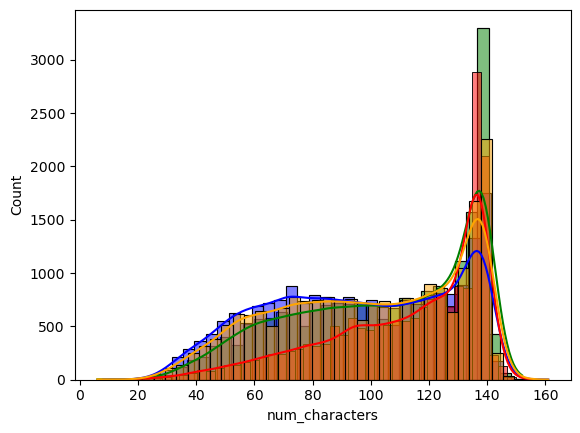

In [23]:
# num of characters distribution in each class 

ax=sns.histplot(df[df["class"]=="irony"]["num_characters"],kde="True",color="green")
sns.histplot(df[df["class"]=="sarcasm"]["num_characters"],kde="True",color="blue")
sns.histplot(df[df["class"]=="regular"]["num_characters"],kde="True",color="red")
sns.histplot(df[df["class"]=="figurative"]["num_characters"],kde="True",color="orange")

In [24]:
# df["sarcastic"]=df['tweets'].str.contains('#sarcastic',"#sarcasm")

In [25]:
# sns.countplot(df[df["class"]=="sarcasm"]["sarcastic"])

# Data Preprocessing

###  Basic Text Cleaning

In [26]:
# Basic Text Cleaning

def clean_text(text):
    
    text=text.lower() # Lower Case
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE) # Remove URLs
    text = re.sub(r"@\w+|\#", "", text)  # Remove mentions and hashtags
    text = re.sub(r"[^a-zA-Z]", " ", text) # Remove special characters and numbers, keep only alphabetic characters
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
    return "".join(text)

In [27]:
df["cleaned_tweets"]=df["tweets"].apply(clean_text)

In [28]:
df.head()

,tweets,class,num_characters,cleaned_tweets
0,Be aware dirty step to get money #staylight ...,figurative,108,be aware dirty step to get money staylight sta...
1,#sarcasm for #people who don't understand #diy...,figurative,80,sarcasm for people who don t understand diy ar...
2,@IminworkJeremy @medsingle #DailyMail readers ...,figurative,132,dailymail readers being sensible as always sho...
3,@wilw Why do I get the feeling you like games?...,figurative,55,why do i get the feeling you like games sarcasm
4,-@TeacherArthurG @rweingarten You probably jus...,figurative,75,you probably just missed the text sarcastic


In [29]:
df["tweets"][1]

"#sarcasm for #people who don't understand #diy #artattack http://t.co/rtyYmuDVUS"

In [30]:
df["cleaned_tweets"][1]

'sarcasm for people who don t understand diy artattack'

### Tokenization

In [31]:
# Tokenization
def tokenize_text(text):
    return word_tokenize(text)

df['tokens'] = df['cleaned_tweets'].apply(tokenize_text)

### Stopword Removal

In [32]:
# Stopword Removal
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stopwords]

df['tokens'] = df['tokens'].apply(remove_stopwords)

### Stemming

In [33]:
# Stemming
def stem_text(tokens):
    ps=PorterStemmer()
    return " ".join([ps.stem(token) for token in tokens])
df["stem_tokens"]=df['tokens'].apply(stem_text)

### Lemmatization

In [34]:
# Lemmatization
def lemmatize_text(tokens):
    lm=WordNetLemmatizer()
    return " ".join([lm.lemmatize(token,pos='v') for token in tokens])

df['lemmatized_tokens'] = df['tokens'].apply(lemmatize_text)

In [35]:
df.head()

,tweets,class,num_characters,cleaned_tweets,tokens,stem_tokens,lemmatized_tokens
0,Be aware dirty step to get money #staylight ...,figurative,108,be aware dirty step to get money staylight sta...,"[aware, dirty, step, get, money, staylight, st...",awar dirti step get money staylight staywhit s...,aware dirty step get money staylight staywhite...
1,#sarcasm for #people who don't understand #diy...,figurative,80,sarcasm for people who don t understand diy ar...,"[sarcasm, people, understand, diy, artattack]",sarcasm peopl understand diy artattack,sarcasm people understand diy artattack
2,@IminworkJeremy @medsingle #DailyMail readers ...,figurative,132,dailymail readers being sensible as always sho...,"[dailymail, readers, sensible, always, shocker...",dailymail reader sensibl alway shocker sarcast...,dailymail readers sensible always shocker sarc...
3,@wilw Why do I get the feeling you like games?...,figurative,55,why do i get the feeling you like games sarcasm,"[get, feeling, like, games, sarcasm]",get feel like game sarcasm,get feel like game sarcasm
4,-@TeacherArthurG @rweingarten You probably jus...,figurative,75,you probably just missed the text sarcastic,"[probably, missed, text, sarcastic]",probabl miss text sarcast,probably miss text sarcastic


## Sentiment analysis using Textblob

In [36]:
from textblob import TextBlob

In [37]:
 def getPolarity(text):
        return TextBlob(text).sentiment.polarity

In [38]:
df['polarity'] = df['lemmatized_tokens'].apply(getPolarity)

In [39]:
df.head()

,tweets,class,num_characters,cleaned_tweets,tokens,stem_tokens,lemmatized_tokens,polarity
0,Be aware dirty step to get money #staylight ...,figurative,108,be aware dirty step to get money staylight sta...,"[aware, dirty, step, get, money, staylight, st...",awar dirti step get money staylight staywhit s...,aware dirty step get money staylight staywhite...,-0.083333
1,#sarcasm for #people who don't understand #diy...,figurative,80,sarcasm for people who don t understand diy ar...,"[sarcasm, people, understand, diy, artattack]",sarcasm peopl understand diy artattack,sarcasm people understand diy artattack,0.000000
2,@IminworkJeremy @medsingle #DailyMail readers ...,figurative,132,dailymail readers being sensible as always sho...,"[dailymail, readers, sensible, always, shocker...",dailymail reader sensibl alway shocker sarcast...,dailymail readers sensible always shocker sarc...,0.100000
3,@wilw Why do I get the feeling you like games?...,figurative,55,why do i get the feeling you like games sarcasm,"[get, feeling, like, games, sarcasm]",get feel like game sarcasm,get feel like game sarcasm,-0.400000
4,-@TeacherArthurG @rweingarten You probably jus...,figurative,75,you probably just missed the text sarcastic,"[probably, missed, text, sarcastic]",probabl miss text sarcast,probably miss text sarcastic,0.100000


In [40]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score >0:
        return 'Positive'
    else:
        return 'Neutral'
        

In [41]:
df['sentiment'] = df['polarity'].apply(getAnalysis)

In [42]:
df['sentiment'].value_counts()

Positive    38803
Neutral     27760
Negative    14796
Name: sentiment, dtype: int64

### converting the score into reaction.
- positive reaction (1)
- negative reaction (-1)
- neutral reaction (0)

In [43]:
df.sentiment = df.sentiment.map({'Negative':-1,'Positive':1,'Neutral':0})

C:\Users\vinay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment', ylabel='Density'>

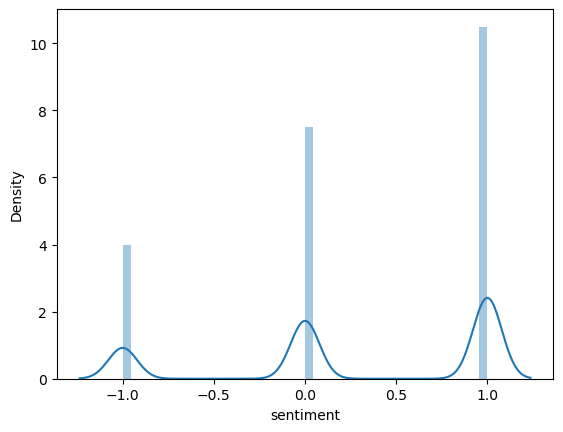

In [44]:
sns.distplot(df.sentiment)

In [45]:
df.head()

,tweets,class,num_characters,cleaned_tweets,tokens,stem_tokens,lemmatized_tokens,polarity,sentiment
0,Be aware dirty step to get money #staylight ...,figurative,108,be aware dirty step to get money staylight sta...,"[aware, dirty, step, get, money, staylight, st...",awar dirti step get money staylight staywhit s...,aware dirty step get money staylight staywhite...,-0.083333,-1
1,#sarcasm for #people who don't understand #diy...,figurative,80,sarcasm for people who don t understand diy ar...,"[sarcasm, people, understand, diy, artattack]",sarcasm peopl understand diy artattack,sarcasm people understand diy artattack,0.000000,0
2,@IminworkJeremy @medsingle #DailyMail readers ...,figurative,132,dailymail readers being sensible as always sho...,"[dailymail, readers, sensible, always, shocker...",dailymail reader sensibl alway shocker sarcast...,dailymail readers sensible always shocker sarc...,0.100000,1
3,@wilw Why do I get the feeling you like games?...,figurative,55,why do i get the feeling you like games sarcasm,"[get, feeling, like, games, sarcasm]",get feel like game sarcasm,get feel like game sarcasm,-0.400000,-1
4,-@TeacherArthurG @rweingarten You probably jus...,figurative,75,you probably just missed the text sarcastic,"[probably, missed, text, sarcastic]",probabl miss text sarcast,probably miss text sarcastic,0.100000,1


C:\Users\vinay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

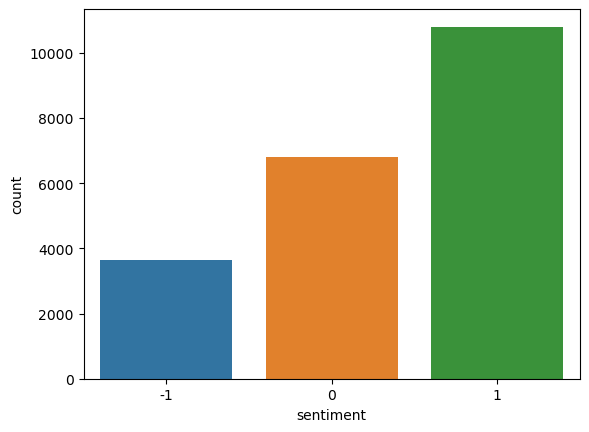

In [46]:
sns.countplot(df[df['class']=='figurative']["sentiment"])

C:\Users\vinay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

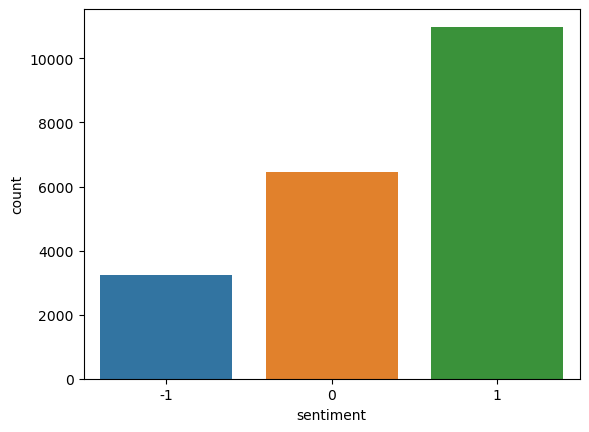

In [47]:
sns.countplot(df[df['class']=='sarcasm']["sentiment"])

C:\Users\vinay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

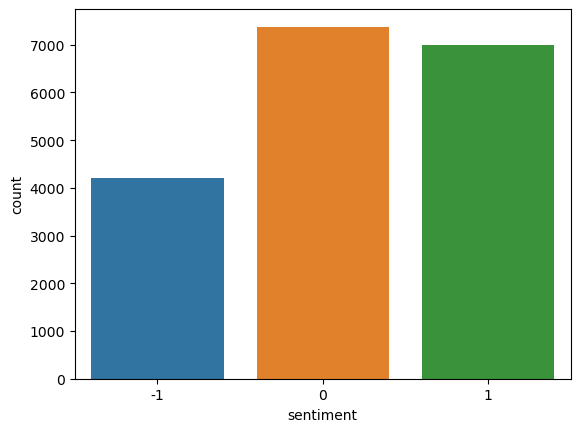

In [48]:
sns.countplot(df[df['class']=='regular']["sentiment"])

C:\Users\vinay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

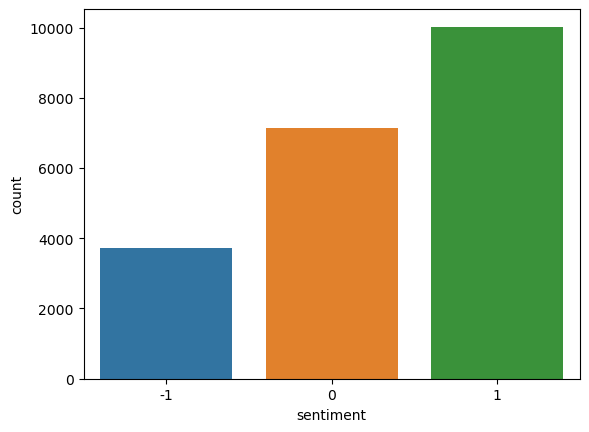

In [49]:
sns.countplot(df[df['class']=='irony']["sentiment"])

In [50]:
df["tweets"][155]

'So I\'m planning music for tonight\'s mass and the reading is about Pharaoh\'s army. I think I\'ll lead with "Come To The Water". #clever #irony'

In [51]:
df["cleaned_tweets"][155]

'so i m planning music for tonight s mass and the reading is about pharaoh s army i think i ll lead with come to the water clever irony'

In [52]:
df["sentiment"][155]

1

In [53]:
df["tokens"][155]

['planning',
 'music',
 'tonight',
 'mass',
 'reading',
 'pharaoh',
 'army',
 'think',
 'lead',
 'come',
 'water',
 'clever',
 'irony']

In [54]:
df["lemmatized_tokens"][155]

'plan music tonight mass read pharaoh army think lead come water clever irony'

In [55]:
df["stem_tokens"][155]

'plan music tonight mass read pharaoh armi think lead come water clever ironi'

In [56]:
df.head()

,tweets,class,num_characters,cleaned_tweets,tokens,stem_tokens,lemmatized_tokens,polarity,sentiment
0,Be aware dirty step to get money #staylight ...,figurative,108,be aware dirty step to get money staylight sta...,"[aware, dirty, step, get, money, staylight, st...",awar dirti step get money staylight staywhit s...,aware dirty step get money staylight staywhite...,-0.083333,-1
1,#sarcasm for #people who don't understand #diy...,figurative,80,sarcasm for people who don t understand diy ar...,"[sarcasm, people, understand, diy, artattack]",sarcasm peopl understand diy artattack,sarcasm people understand diy artattack,0.000000,0
2,@IminworkJeremy @medsingle #DailyMail readers ...,figurative,132,dailymail readers being sensible as always sho...,"[dailymail, readers, sensible, always, shocker...",dailymail reader sensibl alway shocker sarcast...,dailymail readers sensible always shocker sarc...,0.100000,1
3,@wilw Why do I get the feeling you like games?...,figurative,55,why do i get the feeling you like games sarcasm,"[get, feeling, like, games, sarcasm]",get feel like game sarcasm,get feel like game sarcasm,-0.400000,-1
4,-@TeacherArthurG @rweingarten You probably jus...,figurative,75,you probably just missed the text sarcastic,"[probably, missed, text, sarcastic]",probabl miss text sarcast,probably miss text sarcastic,0.100000,1


# Visualization

### Word cloud for regular class

Text(0.5, 1.0, 'WordCloud - regular class')

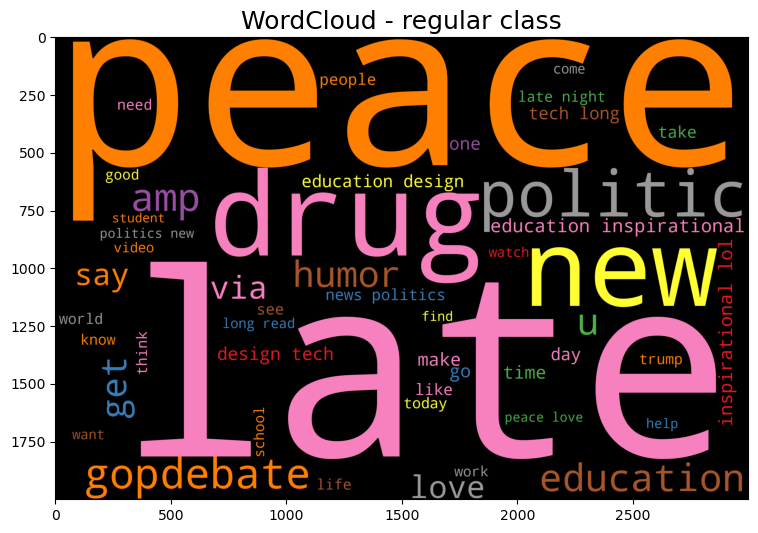

In [57]:
plt.figure(figsize=(12,6))
text =' '.join([text for text in df['lemmatized_tokens'][df['class'] == "regular"]])
wc = WordCloud(width = 3000, height = 2000, background_color = 'black', max_words = 50,
                   colormap = 'Set1',stopwords=stopwords).generate(text)
plt.imshow(wc)
plt.title("WordCloud - regular class", fontsize = 18)

### Word cloud for irony class

Text(0.5, 1.0, 'WordCloud - irony class')

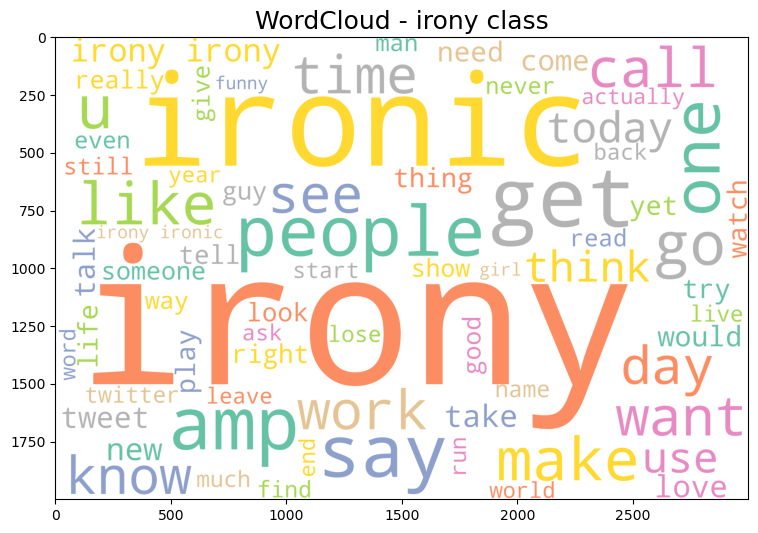

In [58]:
plt.figure(figsize=(12,6))
text =' '.join([text for text in df['lemmatized_tokens'][df['class'] == "irony"]])
wc = WordCloud(width = 3000, height = 2000, background_color = 'white', max_words = 70,
                   colormap = 'Set2',stopwords=stopwords).generate(text)
plt.imshow(wc)
plt.title("WordCloud - irony class", fontsize = 18)

### Word cloud for sarcasm class

Text(0.5, 1.0, 'WordCloud - sarcasm class')

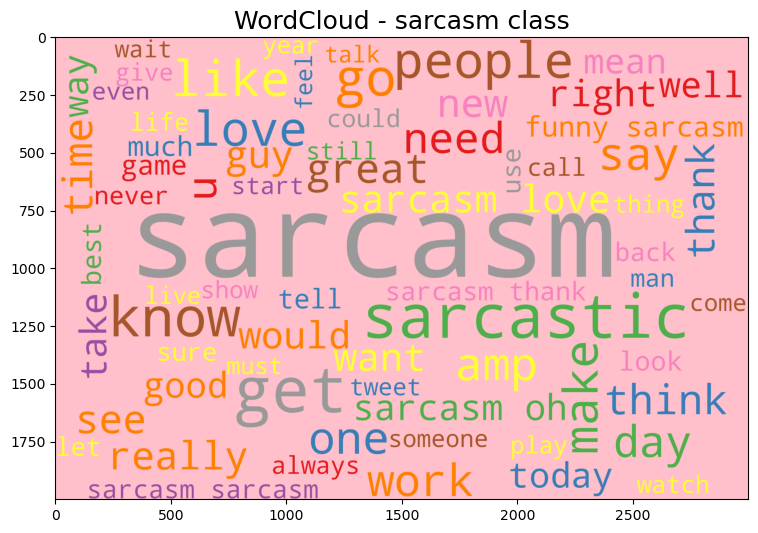

In [59]:
plt.figure(figsize=(12,6))
text =' '.join([text for text in df['lemmatized_tokens'][df['class'] == "sarcasm"]])
wc = WordCloud(width = 3000, height = 2000, background_color = 'pink', max_words = 70,
                   colormap = 'Set1',stopwords=stopwords).generate(text)
plt.imshow(wc)
plt.title("WordCloud - sarcasm class", fontsize = 18)

### Word cloud for figurative class

Text(0.5, 1.0, 'WordCloud - figurative class')

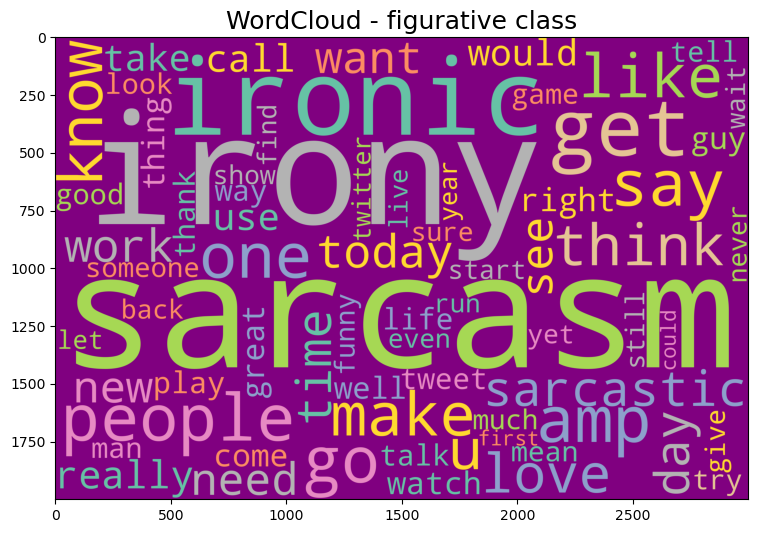

In [60]:
plt.figure(figsize=(12,6))
text =' '.join([text for text in df['lemmatized_tokens'][df['class'] == "figurative"]])
wc = WordCloud(width = 3000, height = 2000, background_color = 'purple', max_words = 70,
                   colormap = 'Set2',stopwords=stopwords).generate(text)
plt.imshow(wc)
plt.title("WordCloud - figurative class", fontsize = 18)

### Top 30 Most common words in Figurative class

In [61]:
figurative_corpus=[]
for msg in df[df['class'] == "figurative"]["lemmatized_tokens"].tolist():
    for word in msg.split():
        figurative_corpus.append(word)

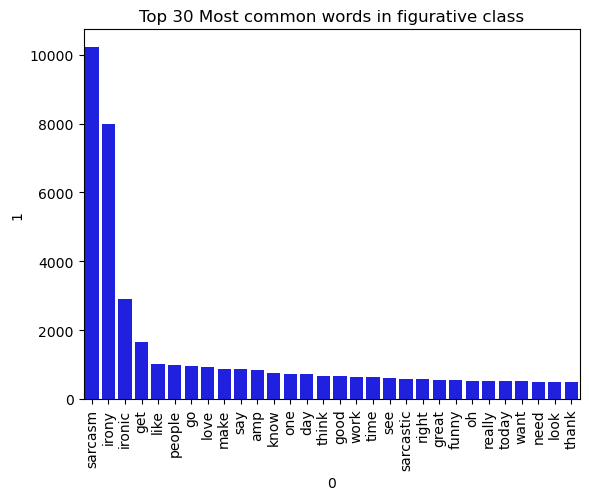

In [62]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(figurative_corpus).most_common(30))[0],y=pd.DataFrame(Counter(figurative_corpus).most_common(30))[1],color="blue")
plt.title("Top 30 Most common words in figurative class")
plt.xticks(rotation="vertical")
plt.show()

### Top 30 Most common words in sarcasm class

In [63]:
sarcasm_corpus=[]
for msg in df[df['class'] == "sarcasm"]["lemmatized_tokens"].tolist():
    for word in msg.split():
        sarcasm_corpus.append(word)

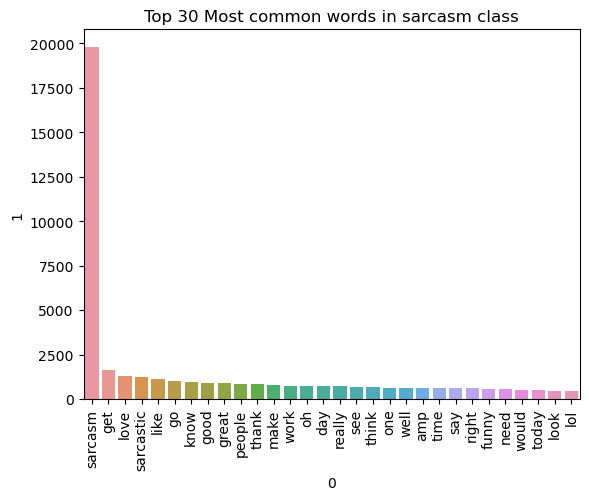

In [64]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(sarcasm_corpus).most_common(30))[0],y=pd.DataFrame(Counter(sarcasm_corpus).most_common(30))[1])
plt.title("Top 30 Most common words in sarcasm class")
plt.xticks(rotation="vertical")
plt.show()

### Top 30 Most common words in irony class

In [65]:
irony_corpus=[]
for msg in df[df['class'] == "irony"]["lemmatized_tokens"].tolist():
    for word in msg.split():
        irony_corpus.append(word)

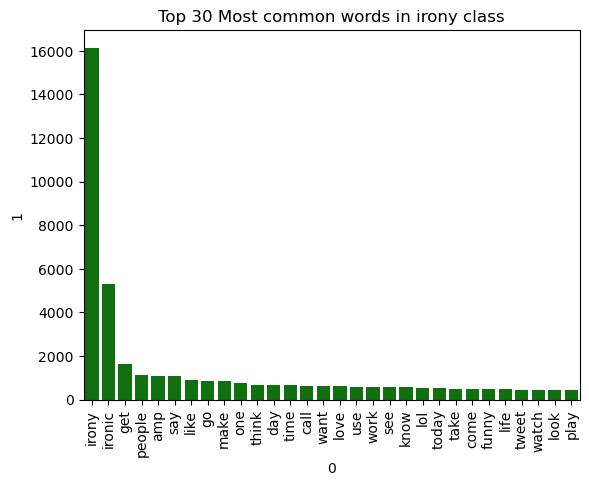

In [66]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(irony_corpus).most_common(30))[0],y=pd.DataFrame(Counter(irony_corpus).most_common(30))[1],color="green")
plt.title("Top 30 Most common words in irony class")
plt.xticks(rotation="vertical")
plt.show()

### Top 30 Most common words in regular class

In [67]:
regular_corpus=[]
for msg in df[df['class'] == "regular"]["lemmatized_tokens"].tolist():
    for word in msg.split():
        regular_corpus.append(word)

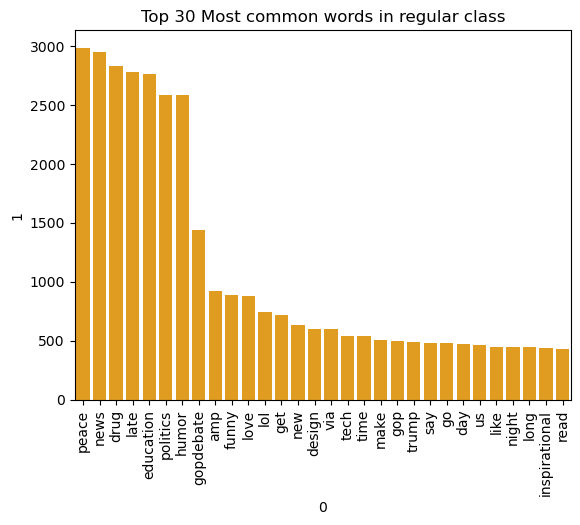

In [68]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(regular_corpus).most_common(30))[0],y=pd.DataFrame(Counter(regular_corpus).most_common(30))[1],color="orange")
plt.title("Top 30 Most common words in regular class")
plt.xticks(rotation="vertical")
plt.show()

### Encoding traget variable 

In [69]:
# Encoding Labels
label_mapping = {
    'figurative': 0,
    'irony': 1,
    'sarcasm': 2,
    'regular': 3
}

df['class_encoded'] = df['class'].map(label_mapping)

In [70]:
df.head()

,tweets,class,num_characters,cleaned_tweets,tokens,stem_tokens,lemmatized_tokens,polarity,sentiment,class_encoded
0,Be aware dirty step to get money #staylight ...,figurative,108,be aware dirty step to get money staylight sta...,"[aware, dirty, step, get, money, staylight, st...",awar dirti step get money staylight staywhit s...,aware dirty step get money staylight staywhite...,-0.083333,-1,0
1,#sarcasm for #people who don't understand #diy...,figurative,80,sarcasm for people who don t understand diy ar...,"[sarcasm, people, understand, diy, artattack]",sarcasm peopl understand diy artattack,sarcasm people understand diy artattack,0.000000,0,0
2,@IminworkJeremy @medsingle #DailyMail readers ...,figurative,132,dailymail readers being sensible as always sho...,"[dailymail, readers, sensible, always, shocker...",dailymail reader sensibl alway shocker sarcast...,dailymail readers sensible always shocker sarc...,0.100000,1,0
3,@wilw Why do I get the feeling you like games?...,figurative,55,why do i get the feeling you like games sarcasm,"[get, feeling, like, games, sarcasm]",get feel like game sarcasm,get feel like game sarcasm,-0.400000,-1,0
4,-@TeacherArthurG @rweingarten You probably jus...,figurative,75,you probably just missed the text sarcastic,"[probably, missed, text, sarcastic]",probabl miss text sarcast,probably miss text sarcastic,0.100000,1,0


## Vectorizaton

In [71]:
## Bag of words(BOW)
## cv = CountVectorizer(max_features=2000)

### 1. TF-IDF

In [72]:
## TF-IDF
tf = TfidfVectorizer(max_features=2000)

# Model building

In [73]:
#x=cv.fit_transform(df["lemmatized_tokens"]).toarray()
#x=tf.fit_transform(df["stem_tokens"]).toarray()
x=tf.fit_transform(df["lemmatized_tokens"]).toarray()
# x = pd.DataFrame(x, columns = tf.get_feature_names())
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [74]:
tf.vocabulary_

{'aware': 126,
 'dirty': 501,
 'step': 1677,
 'get': 749,
 'money': 1156,
 'sarcastic': 1518,
 'sarcasm': 1517,
 'people': 1285,
 'understand': 1857,
 'always': 56,
 'shocker': 1576,
 'feel': 658,
 'like': 1039,
 'game': 739,
 'probably': 1373,
 'miss': 1148,
 'text': 1772,
 'tune': 1840,
 'treat': 1825,
 'fight': 668,
 'song': 1636,
 'move': 1168,
 'amp': 64,
 'local': 1053,
 'irony': 946,
 'dc': 456,
 'love': 1067,
 'man': 1088,
 'wish': 1949,
 'could': 401,
 'go': 758,
 'jail': 952,
 'car': 266,
 'ride': 1484,
 'listen': 1046,
 'whole': 1935,
 'time': 1797,
 'yeah': 1980,
 'wait': 1897,
 'either': 564,
 'call': 250,
 'best': 168,
 'movie': 1170,
 'yet': 1987,
 'decide': 463,
 'whether': 1932,
 'sorry': 1641,
 'dark': 448,
 'sense': 1550,
 'humor': 875,
 'work': 1959,
 'yay': 1978,
 'fuck': 730,
 'goodnight': 766,
 'town': 1817,
 'come': 354,
 'mets': 1128,
 'loss': 1064,
 'double': 519,
 'team': 1754,
 'think': 1780,
 'hot': 861,
 'spot': 1659,
 'police': 1328,
 'plan': 1314,
 'btw'

In [75]:
x.shape

(81359, 2000)

In [76]:
y=df["class_encoded"].values
y

array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

In [77]:
# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()
# x=scaler.fit_transform(x)

### Splitting into train and test data

In [78]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=2)

- ### Naive Bayes Algorithm

In [79]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [80]:
gnb=GaussianNB() # Gaussian naive bayes object
mnb=MultinomialNB() # Multinomal naive bayes object
bnb=BernoulliNB() # Bernoulli naive bayes object

In [81]:
# Gaussian naive bayes algorithm 

gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
acc1=accuracy_score(y_test,y_pred1)
cm1=confusion_matrix(y_test,y_pred1)
cr1=classification_report(y_test,y_pred1)
print(cr1)

              precision    recall  f1-score   support

           0       0.30      0.24      0.27      4255
           1       0.56      0.65      0.60      4205
           2       0.58      0.75      0.66      4156
           3       0.97      0.71      0.82      3656

    accuracy                           0.58     16272
   macro avg       0.61      0.59      0.59     16272
weighted avg       0.59      0.58      0.58     16272



In [82]:
# Multinomal naive bayes algorithm

mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
acc2=accuracy_score(y_test,y_pred2)
cm2=confusion_matrix(y_test,y_pred2)
cr2=classification_report(y_test,y_pred2)
print(cr2)

              precision    recall  f1-score   support

           0       0.31      0.26      0.28      4255
           1       0.63      0.70      0.67      4205
           2       0.64      0.71      0.67      4156
           3       0.94      0.91      0.93      3656

    accuracy                           0.63     16272
   macro avg       0.63      0.64      0.64     16272
weighted avg       0.62      0.63      0.63     16272



In [83]:
# Bernoulli naive bayes

bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
acc3=accuracy_score(y_test,y_pred3)
cm3=confusion_matrix(y_test,y_pred3)
cr3=classification_report(y_test,y_pred3)
print(cr3)

              precision    recall  f1-score   support

           0       0.29      0.08      0.13      4255
           1       0.66      0.90      0.76      4205
           2       0.65      0.90      0.76      4156
           3       1.00      0.99      0.99      3656

    accuracy                           0.71     16272
   macro avg       0.65      0.72      0.66     16272
weighted avg       0.64      0.71      0.65     16272



- ### Logistic Regression Algorithm

In [84]:
from sklearn.linear_model import LogisticRegression

In [85]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred4=lr.predict(x_test)
acc4=accuracy_score(y_test,y_pred4)
c4=confusion_matrix(y_test,y_pred4)
cr4=classification_report(y_test,y_pred4)
print(cr4)

              precision    recall  f1-score   support

           0       0.27      0.04      0.06      4255
           1       0.66      0.96      0.78      4205
           2       0.66      0.94      0.77      4156
           3       0.99      1.00      1.00      3656

    accuracy                           0.72     16272
   macro avg       0.65      0.73      0.65     16272
weighted avg       0.63      0.72      0.64     16272



C:\Users\vinay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [86]:
clfs = {
    'Gaussian NB' : gnb,
    'Multinomal NB' : mnb, 
    'Bernoulli NB': bnb, 
    'LogisticRegression': lr, 
}
accuracy_scores = [acc1,acc2,acc3,acc4]

In [87]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores}).sort_values('Accuracy',ascending=False)

# Evaluation

In [88]:
performance_df

,Algorithm,Accuracy
3,LogisticRegression,0.722284
2,Bernoulli NB,0.706735
1,Multinomal NB,0.633112
0,Gaussian NB,0.582350


### 2. Using Word2vec

In [89]:
!pip install gensim scikit-learn

In [90]:
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

In [91]:
# Generate word embeddings

# Load and preprocess the tweet data
tweets = df['lemmatized_tokens']
model = Word2Vec(tweets, vector_size=100, window=5, min_count=1, sg=1)

In [92]:
# Generate word embeddings
word_embeddings = model.wv

# Create tweet-level feature representations
features = []
removed_tweets = []
removed_indices = []

for i, tweet in enumerate(tweets):
    # Preprocess tweet: remove out-of-vocabulary words
    preprocessed_tweet = [word for word in tweet if word in word_embeddings.key_to_index]
    
    if preprocessed_tweet:
        tweet_embedding = [word_embeddings.get_vector(word) for word in preprocessed_tweet]
        tweet_embedding = np.mean(tweet_embedding, axis=0)  # Average word vectors
        features.append(tweet_embedding)
    else:
        removed_tweets.append(tweet)
        removed_indices.append(i)

In [93]:
# Convert the feature list to a numpy array
features = np.array(features)

# Create a DataFrame for removed tweets and indices
removed_df = pd.DataFrame({'Removed_Tweets': removed_tweets, 'Indices': removed_indices})

# Print the number of removed tweets
print(f"Number of removed tweets: {len(removed_tweets)}")

removed_df

Number of removed tweets: 5


,Removed_Tweets,Indices
0,,8617
1,,22484
2,,31025
3,,38434
4,,76009


In [94]:
df_cleaned = df.drop(removed_indices)
df_cleaned.reset_index(drop=True, inplace=True)

df_cleaned.head()

,tweets,class,num_characters,cleaned_tweets,tokens,stem_tokens,lemmatized_tokens,polarity,sentiment,class_encoded
0,Be aware dirty step to get money #staylight ...,figurative,108,be aware dirty step to get money staylight sta...,"[aware, dirty, step, get, money, staylight, st...",awar dirti step get money staylight staywhit s...,aware dirty step get money staylight staywhite...,-0.083333,-1,0
1,#sarcasm for #people who don't understand #diy...,figurative,80,sarcasm for people who don t understand diy ar...,"[sarcasm, people, understand, diy, artattack]",sarcasm peopl understand diy artattack,sarcasm people understand diy artattack,0.000000,0,0
2,@IminworkJeremy @medsingle #DailyMail readers ...,figurative,132,dailymail readers being sensible as always sho...,"[dailymail, readers, sensible, always, shocker...",dailymail reader sensibl alway shocker sarcast...,dailymail readers sensible always shocker sarc...,0.100000,1,0
3,@wilw Why do I get the feeling you like games?...,figurative,55,why do i get the feeling you like games sarcasm,"[get, feeling, like, games, sarcasm]",get feel like game sarcasm,get feel like game sarcasm,-0.400000,-1,0
4,-@TeacherArthurG @rweingarten You probably jus...,figurative,75,you probably just missed the text sarcastic,"[probably, missed, text, sarcastic]",probabl miss text sarcast,probably miss text sarcastic,0.100000,1,0


In [95]:
y=df_cleaned["class_encoded"]

In [96]:
features

array([[ 0.01527867,  0.04205794,  0.13669422, ..., -0.08601493,
         0.00414553, -0.02626259],
       [ 0.01492426,  0.04078452,  0.13495648, ..., -0.09427028,
         0.0058537 , -0.02804891],
       [ 0.00574042,  0.036201  ,  0.12912975, ..., -0.10135818,
         0.00759022, -0.02657681],
       ...,
       [ 0.01165682,  0.0524023 ,  0.12804276, ..., -0.08652987,
         0.01061703, -0.03457617],
       [ 0.00245415,  0.03418854,  0.1393359 , ..., -0.09390915,
         0.00613481, -0.02786454],
       [ 0.00759919,  0.03625347,  0.13221379, ..., -0.09362091,
        -0.00155519, -0.0300962 ]], dtype=float32)

In [97]:
y

0        0
1        0
2        0
3        0
4        0
        ..
81349    2
81350    2
81351    2
81352    2
81353    2
Name: class_encoded, Length: 81354, dtype: int64

In [98]:
# Split data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=42)

In [100]:
# Train logistic regression classifier
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predict labels for the test set
y_pred5 = classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.26      0.21      0.23      4179
           1       0.53      0.61      0.57      4236
           2       0.58      0.63      0.60      4179
           3       0.55      0.53      0.54      3677

    accuracy                           0.49     16271
   macro avg       0.48      0.49      0.49     16271
weighted avg       0.48      0.49      0.48     16271



C:\Users\vinay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [101]:
# Bernoulli naive bayes classifier

bnb.fit(X_train,y_train)
y_pred6=bnb.predict(X_test)
acc6=accuracy_score(y_test,y_pred6)
cm6=confusion_matrix(y_test,y_pred6)
cr6=classification_report(y_test,y_pred6)
print(cr6)

              precision    recall  f1-score   support

           0       0.25      0.10      0.14      4179
           1       0.35      0.75      0.48      4236
           2       0.50      0.48      0.49      4179
           3       0.33      0.14      0.20      3677

    accuracy                           0.37     16271
   macro avg       0.36      0.37      0.33     16271
weighted avg       0.36      0.37      0.33     16271

